<a href="https://colab.research.google.com/github/Ketan081998/Python-Projects-/blob/main/Sales_Dataset_Analysis_using_Timeseries_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [36]:
# Try 'latin1' encoding
df = pd.read_csv("/content/Sales_Data.csv", parse_dates=['YEAR_ID'], index_col='SALES', encoding='latin1')


In [37]:
# Convert 'ORDERDATE' column to datetime and handle non-datetime values
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'], errors='coerce')

In [38]:
# Drop rows with NaN values in the 'ORDERDATE' column
df.dropna(subset=['ORDERDATE'], inplace=True)

In [39]:
# Now the 'ORDERDATE' column contains only valid datetime values
print(df)

         ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER  ORDERDATE  \
SALES                                                                          
2871.00        10107               30      95.70                2 2003-02-24   
2765.90        10121               34      81.35                5 2003-05-07   
3884.34        10134               41      94.74                2 2003-07-01   
3746.70        10145               45      83.26                6 2003-08-25   
5205.27        10159               49     100.00               14 2003-10-10   
...              ...              ...        ...              ...        ...   
2244.40        10350               20     100.00               15 2004-12-02   
3978.51        10373               29     100.00                1 2005-01-31   
5417.57        10386               43     100.00                4 2005-03-01   
2116.16        10397               34      62.24                1 2005-03-28   
3079.44        10414               47   

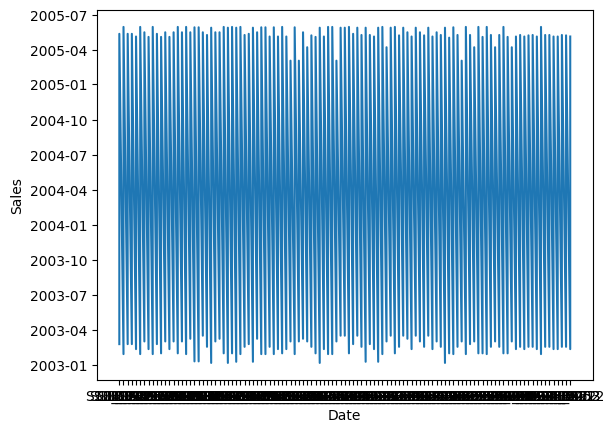

In [40]:
import pandas as pd

# Loading the dataset
df = pd.read_csv("/content/Sales_Data.csv", encoding='latin1')

# Convert 'ORDERDATE' column to datetime and handle non-datetime values
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'], errors='coerce')

# Drop rows with NaN values in the 'ORDERDATE' column
df.dropna(subset=['ORDERDATE'], inplace=True)

# Remove time component and keep only the date
df['ORDERDATE'] = df['ORDERDATE'].dt.date

# Visualizing the time series data
import matplotlib.pyplot as plt

plt.plot(df['PRODUCTCODE'], df['ORDERDATE'])
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()


In [41]:
# Check for non-numeric values in the 'SALES' column
non_numeric_sales = df['SALES'].apply(lambda x: not pd.api.types.is_numeric_dtype(x))


In [42]:
# Print rows with non-numeric values in 'SALES'
print(df[non_numeric_sales])

# Handle non-numeric values (replace with NaN or drop rows)
df['SALES'] = pd.to_numeric(df['SALES'], errors='coerce')
df.dropna(subset=['SALES'], inplace=True)

# Fitting the ARIMA model
model = ARIMA(df['SALES'], order=(2, 1, 1))
model_fit = model.fit()


      ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0           10107               30      95.70                2  2871.00   
1           10121               34      81.35                5  2765.90   
2           10134               41      94.74                2  3884.34   
3           10145               45      83.26                6  3746.70   
4           10159               49     100.00               14  5205.27   
...           ...              ...        ...              ...      ...   
2818        10350               20     100.00               15  2244.40   
2819        10373               29     100.00                1  3978.51   
2820        10386               43     100.00                4  5417.57   
2821        10397               34      62.24                1  2116.16   
2822        10414               47      65.52                9  3079.44   

       ORDERDATE    STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0     2003-02-24   Shipped       1   